In [2]:
import pytesseract      
from PIL import Image as im             
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import re
import numpy as np
import matplotlib.image as mpimg
import cv2

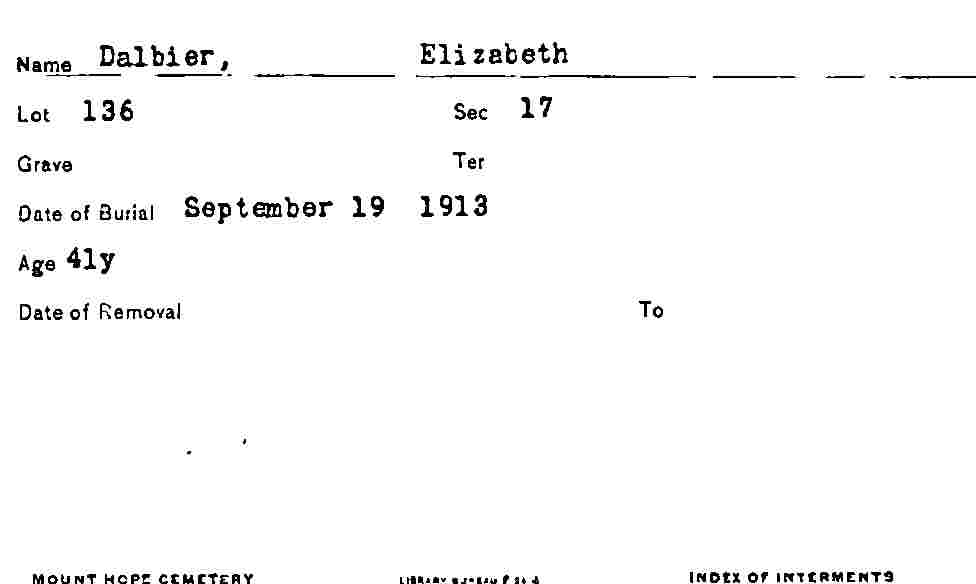

In [11]:
from IPython.display import Image
Image(filename='/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg' )
#Image(filename='/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021959_1_Dailey_Sara.jpg')


In [12]:
#--------------------------------------Converting an Image into Text--------------------------------------------------
 # opening an image from the source path

img = im.open('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg')    
#img = im.open('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021959_1_Dailey_Sara.jpg')
print(img)    
# path where the tesseract module is installed
pytesseract.pytesseract.tesseract_cmd =r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'   
# converts the image to result and saves it into result variable
result = pytesseract.image_to_string(img)   
# write text in a text file and save it to source path   
with open('abc.txt',mode ='w') as file:     
      
                 file.write(result)
                 print(result)
 

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=976x584 at 0x7FF79F7608B0>
 

Name Dalbier, Elizabeth
Lo 136 Sec 17
Grave Ter

Date of Burial September 19 1913

Age 4ly

Date of Removal

MOUNT HOPF COMETEAY

Lraaev exetsy Para

To

INDEX OF INTERMENTS



In [13]:
#-------------------------------------------Preprocessing-----------------------------------------------------------
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#canny edge detection
def canny(image):
    return cv2.Canny(image,128, 255)

In [14]:
image = cv2.imread('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg')

gray = get_grayscale(image)
noise_free = remove_noise(gray)
thresh = thresholding(gray)

list_prep = [gray,noise_free, thresh]

 

Name Dalbier, Elizabeth
Lo 136 Sec 17
Grave Ter

Date of Burial September 19 1913

Age 4ly

Date of Removal

MOUNT HOPF CLMCTEAY

 

To

INDEX OF INTERMENTS



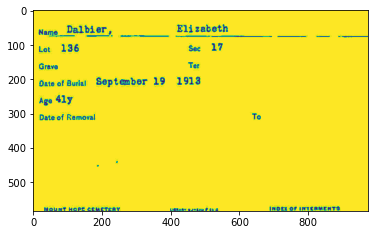

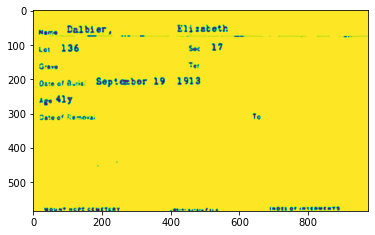

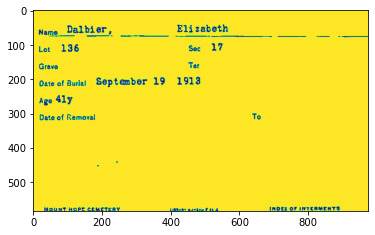

In [15]:
#output of different preprocessing techniques
def process(filename, f):
    plt.figure()
    plt.imshow(f)

for i , file in zip(range(0,3),list_prep):
    process('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg', file)
    
result_new = pytesseract.image_to_string(thresh) 
print(result_new)

In [16]:
#extracting Useful information from the image File 

file1 = open("abc.txt","r+") 
r = file1.read()
rx = r.splitlines()
for i in rx:
    last_name = []
    first_name = []
    buriel_date= []
    Age = []
    lot = []
    sec = []
    
    if 'Name' in i:
        name = i.split()
        last_name =name[1]
        first_name = name[2]
        print('LAST NAME :', last_name)
        print('FIRST NAME :',first_name)
    elif 'Age' in i:
        age_x = i.split()
        age_y = age_x[1]
        if 'l' in age_y:
            Age = int(age_y.replace('l', '1').replace('y',' '))
        print('AGE : ', Age)
    elif 'Date of Burial' in i:
        buriel_date = i[14:]
        print('BURIEL DATE :', buriel_date)  
    elif ('Lo' in i) and ('Sec' in i):
        new = i.split(sep= ' ')
        lot = new[1]
        sec = new[3]
        print('LOT :',lot)
        print('SEC :',sec)            

LAST NAME : Dalbier,
FIRST NAME : Elizabeth
LOT : 136
SEC : 17
BURIEL DATE :  September 19 1913
AGE :  41


In [17]:
#we can also convert the image properties and have a full overall desriptions - I found out that conf interval differs 
#based on if the actual text is present
result1 = pytesseract.image_to_data(image)
print(result1)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	976	584	-1	
2	1	1	0	0	0	46	64	930	24	-1	
3	1	1	1	0	0	46	64	930	24	-1	
4	1	1	1	1	0	46	64	930	24	-1	
5	1	1	1	1	1	46	64	930	24	95	 
2	1	2	0	0	0	17	42	551	182	-1	
3	1	2	1	0	0	17	42	551	130	-1	
4	1	2	1	1	0	17	42	551	34	-1	
5	1	2	1	1	1	17	57	54	15	69	Name
5	1	2	1	1	2	100	45	132	31	69	Dalbier,
5	1	2	1	1	3	420	42	148	23	96	Elizabeth
4	1	2	1	2	0	18	96	534	26	-1	
5	1	2	1	2	1	18	106	32	16	79	Lo
5	1	2	1	2	2	84	99	49	22	79	136
5	1	2	1	2	3	454	103	33	17	89	Sec
5	1	2	1	2	4	521	96	31	22	89	17
4	1	2	1	3	0	18	145	466	38	-1	
5	1	2	1	3	1	18	145	53	38	96	Grave
5	1	2	1	3	2	453	152	31	17	96	Ter
3	1	2	2	0	0	19	194	468	30	-1	
4	1	2	2	1	0	19	194	468	30	-1	
5	1	2	2	1	1	19	205	43	17	94	Date
5	1	2	2	1	2	71	205	19	16	94	of
5	1	2	2	1	3	100	204	53	16	93	Burial
5	1	2	2	1	4	185	196	148	28	95	September
5	1	2	2	1	5	353	196	31	21	96	19
5	1	2	2	1	6	421	194	66	23	96	1913
2	1	3	0	0	0	19	247	95	34	-1	
3	1	3	1	0	0	19	247	96	34	-1

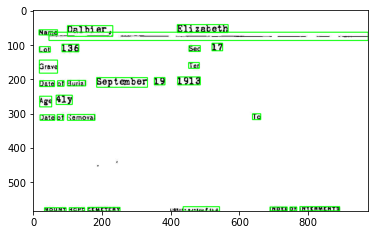

In [18]:
#find the location of elements in boxes using ['conf'] attribute of the image data
img = cv2.imread('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg')
d= pytesseract.image_to_data(img,output_type=pytesseract.Output.DICT, config=r'--psm 3 --oem 1') 
n_boxes = len(d['level'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 55: #if you check the code block above this you can see that most of the text elements shows CONF attribute value above 55
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

In [19]:
#--------------------------------------Storing the data into database------------------------------------------------
#locate the directory
images = os.listdir('/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/')
data_for_csv = []
i = 1

#convert image data into text and append the file in CSV
for image in images:
    print(i,image)
    im_gray =cv2.imread(f'/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/{image}', cv2.IMREAD_GRAYSCALE)
    (thresh, im_bnw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
    pytesseract.pytesseract.tesseract_cmd = '/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'
    text = pytesseract.image_to_string(im_bnw)
    text_detection = {"imagename": image, "text": text}
    i += 1
    data_for_csv.append(text_detection)

    
df = pd.DataFrame(data_for_csv)
df.to_csv("textual_infomration.csv")

1 iCard_021875_1_Daba_Shorro.jpg
2 iCard_021960_1.jpg
3 iCard_021912_1_Dahlberg_John.jpg
4 iCard_021894_1_Daehn_Herman_W.jpg
5 iCard_021936_1_Dahlstrom_Violet.jpg
6 iCard_021977_1_Daker_Raphael.jpg
7 iCard_021988_1_Dako_Martha.jpg
8 iCard_021906_1_Dagdigian_Robert.jpg
9 iCard_021927_1_Dahlstrom_Anna.jpg
10 iCard_021982_1_Dakin_Hannah_Lois.jpg
11 iCard_021895_1_Daemicke_George_F.jpg
12 iCard_021908_1_Dagdigian.jpg
13 iCard_021914_1_Dahleen_Robert_Charles.jpg
14 iCard_021911_1_Daggs_Ernest.jpg
15 iCard_021917_1_Dahlem_Roy_A.jpg
16 iCard_021942_1_Dahne_Richard.jpg
17 iCard_021975_1_Daker_Laura.jpg
18 iCard_021934_1_Dahlstrom_Ragnar_F.jpg
19 iCard_021976_1_Daker_Ralph.jpg
20 iCard_021955_1_Dailey_Mary.jpg
21 iCard_021921_1_Dahlin_Anna_V.jpg
22 iCard_021896_1_Daemicke_Ernestine.jpg
23 iCard_021920_1_Dahlin_Anna_V.jpg
24 iCard_021945_1_Dahnke_Louise_Dorothy.jpg
25 iCard_021951_1_Dailey_Leon.jpg
26 iCard_021985_1_Dako_Andrew.jpg
27 iCard_021963_1_Daily_Scott_E.jpg
28 iCard_021984_1_Dakin_Pete

In [21]:
#categorizing the images based on clusters

In [22]:
#Application of OCR:
#we can push the csv file into a databases like hadoop's HDFS or SQL server 
#we can also use this file to retrieve the infomration stored for a particular person
#we can create a dataframe and use it to create data visualization story using tableau or other visualization paltofroms 


# Clustering Burial records - Type Resemblence

We can use these images and try to identify what kind of docs they are:


In [23]:
# Example of the VGG-16 prediction. This shows the top 5 classifications
# This code also classifies what is the probability of the image and it's respective source

imagepath = "/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021990_1_DALBIER_ELIZABETH.jpg"
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img(imagepath, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
for i in range(5):
    top_label = label[0][i]
    # print the classification
    print('%s (%.2f%%)' % (top_label[1], top_label[2]*100))
    
os.chdir("/Users/avinashtripathi/Downloads/")
#Brownlee, J. (2017). How to Use The Pre-Trained VGG Model to Classify Objects in Photographs. Retrieved 1 July 2021, from https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

web_site (27.27%)
menu (20.62%)
envelope (7.30%)
monitor (1.75%)
screen (0.83%)


# Clustering Burial records

according to the slides there are different forms of the burial record and extractig information from each type takes a little bit of different apprach. thus the idea behind clustering the similar types of image is to be able to write a cluster specific code to pull out information more accurately

In [24]:
#Image classification using Kmeans 
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

# Variables
imdir = '/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019'
os.chdir("/Users/avinashtripathi/Downloads/")
targetdir = "clusters/"
number_clusters = 3

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
os.makedirs(targetdir, exist_ok=True)
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    os.makedirs(f"{targetdir}{m}", exist_ok=True)
    print(filelist[i])
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], f"{targetdir}{m}/{filelist[i].split('/')[-1]}")
    
#ref : (2021). Retrieved 1 July 2021, from https://newbedev.com/image-clustering-by-its-similarity-in-python

    Status: 119 / 120

/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021874_1_Daba_Lemanee.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021875_1_Daba_Shorro.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021876_1_Dabe_Patricia_Jean.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021877_1_Dabney_Abraham_L.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021878_1_DABNEY_ERWIN_OTIS.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021880_1_Dabney_Frances.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021881_1_Dabney_Jermaine_Lemont.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021882_1_Dabney_Martha.jpg
/Users/avinashtripathi/Downloads/OneDrive_1_11-6-2019/iCard_021883_1_Dabney_Moses.j

In [25]:
#creating a seperate csv file for each of the clusters 
for i in range(0,3):
    os.chdir(f"/Users/avinashtripathi/Downloads/clusters/{i}")
    images = os.listdir(f'/Users/avinashtripathi/Downloads/clusters/{i}')
    data_for_cluster = []
    j = 1
    print(f"CLUSTER{i}")
    print("----------------------------------------------------------------------------------------------")
    
    #convert image data into text and append the file in CSV
    for image in images:
        print(j,image)
        im_gray =cv2.imread(f'/Users/avinashtripathi/Downloads/clusters/{i}/{image}', cv2.IMREAD_GRAYSCALE)
        (thresh, im_bnw) = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
        pytesseract.pytesseract.tesseract_cmd = '/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'
        text = pytesseract.image_to_string(im_bnw)
        text_detection = {"imagename": image, "text": text}
        j += 1
        data_for_cluster.append(text_detection)


    df = pd.DataFrame(data_for_cluster)
    df.to_csv(f"textual_infomration_{i}.csv")
    
#Future Goal- use this clusters and implement clusters specific preprocssing to have more focused way of editing on t-
#he retrieved text
#-> We tried to run our first preprocessing code on the cluster 1

`
#= Because the intial sample image belong to the cluster 1. If you want to preprocess the data for different-
#clusters we need to build a different preprocessing code for them since they vary significantly.

CLUSTER0
----------------------------------------------------------------------------------------------
1 iCard_021894_1_Daehn_Herman_W.jpg
2 iCard_021936_1_Dahlstrom_Violet.jpg
3 iCard_021988_1_Dako_Martha.jpg
4 iCard_021906_1_Dagdigian_Robert.jpg
5 iCard_021927_1_Dahlstrom_Anna.jpg
6 iCard_021914_1_Dahleen_Robert_Charles.jpg
7 iCard_021917_1_Dahlem_Roy_A.jpg
8 iCard_021934_1_Dahlstrom_Ragnar_F.jpg
9 iCard_021921_1_Dahlin_Anna_V.jpg
10 iCard_021985_1_Dako_Andrew.jpg
11 iCard_021909_1_Dagger_Sr_James_R.jpg
12 iCard_021919_1_Dahlgren_Alice.jpg
13 iCard_021928_1_Dahlstrom_Carl_E.jpg
14 iCard_021986_1_Dako_Andrew.jpg
15 iCard_021923_1_Dahlin_Victor_D.jpg
16 iCard_021931_1_Dahlstrom_Elmer_W.jpg
17 iCard_021924_1_Dahlke_Bertha.jpg
18 iCard_021954_1_Dailey_Margaret.jpg
19 iCard_021970_1_Dainty_Ollie_M.jpg
20 iCard_021932_1_Dahlstrom_Esther.jpg
21 iCard_021946_1_Dahnke_Mae_Caroline.jpg
22 iCard_021962_1_Daily_Ruth.jpg
23 iCard_021939_1_Dahn_Catherine.jpg
24 iCard_021940_1_Dahn_Edward_H.jpg
25